# Mario Enrique Pisquiy Gomez
### Carné 20200399

## Importación de librerías

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from matplotlib.ticker import StrMethodFormatter
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import BaggingRegressor
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
from sklearn.svm import SVR
import seaborn as sns
import pandas as pd
import numpy as np
import math
%matplotlib inline

## Carga de la data

In [2]:
df = pd.read_csv('Spotify_Youtube.csv')

## Exploración de la data

In [3]:
df.columns

Index(['Unnamed: 0', 'Artist', 'Url_spotify', 'Track', 'Album', 'Album_type',
       'Uri', 'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Url_youtube', 'Title', 'Channel', 'Views', 'Likes',
       'Comments', 'Description', 'Licensed', 'official_video', 'Stream'],
      dtype='object')

In [4]:
df.Artist.nunique()

2079

In [5]:
df = df.drop(columns=[
    'Unnamed: 0', 
    'Url_spotify', 
    'Track', 
    'Album', 
    'Album_type',
    'Uri',
    'Url_youtube', 
    'Duration_ms',
    'Title', 
    'Channel', 
    'Views', 
    'Likes',
    'Comments', 
    'Description',
    'Licensed', 
    'official_video'])


In [6]:
df.head()

,Artist,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Stream
0,Gorillaz,0.818,0.705,6.0,-6.679,0.1770,0.008360,0.002330,0.6130,0.772,138.559,1.040235e+09
1,Gorillaz,0.676,0.703,8.0,-5.815,0.0302,0.086900,0.000687,0.0463,0.852,92.761,3.100837e+08
2,Gorillaz,0.695,0.923,1.0,-3.930,0.0522,0.042500,0.046900,0.1160,0.551,108.014,6.306347e+07
3,Gorillaz,0.689,0.739,2.0,-5.810,0.0260,0.000015,0.509000,0.0640,0.578,120.423,4.346636e+08
4,Gorillaz,0.663,0.694,10.0,-8.627,0.1710,0.025300,0.000000,0.0698,0.525,167.953,6.172597e+08


In [7]:
df.shape

(20718, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            20718 non-null  object 
 1   Danceability      20716 non-null  float64
 2   Energy            20716 non-null  float64
 3   Key               20716 non-null  float64
 4   Loudness          20716 non-null  float64
 5   Speechiness       20716 non-null  float64
 6   Acousticness      20716 non-null  float64
 7   Instrumentalness  20716 non-null  float64
 8   Liveness          20716 non-null  float64
 9   Valence           20716 non-null  float64
 10  Tempo             20716 non-null  float64
 11  Stream            20142 non-null  float64
dtypes: float64(11), object(1)
memory usage: 1.9+ MB


In [9]:
df.isna().sum()

Artist                0
Danceability          2
Energy                2
Key                   2
Loudness              2
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Stream              576
dtype: int64

In [10]:
dataNa = df.isna().sum()
dataNa[11]/df.shape[0]

0.02780191138140747

In [11]:
# Porcentaje de la data que es NA, por ser un 2% del total de las observaciones, por ello decido eliminarla
df = df.dropna()

In [12]:
df.isna().sum()

Artist              0
Danceability        0
Energy              0
Key                 0
Loudness            0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
Stream              0
dtype: int64

In [13]:
#Cambio la columna Stream a int porque el número de Streams debe ser un entero y para poder ver el número completo
df['Stream'] = df['Stream'].astype('int')

In [14]:
df.describe()

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Stream
count,20140.000000,20140.000000,20140.000000,20140.000000,20140.000000,20140.000000,20140.000000,20140.000000,20140.000000,20140.000000,2.014000e+04
mean,0.620460,0.635153,5.290318,-7.644976,0.095312,0.291900,0.055457,0.192971,0.529521,120.628974,1.311341e+08
std,0.165506,0.214007,3.577017,4.633981,0.106977,0.286446,0.192882,0.167876,0.245295,29.601307,2.434240e+08
min,0.000000,0.000020,0.000000,-46.251000,0.000000,0.000001,0.000000,0.014500,0.000000,0.000000,-2.147484e+09
25%,0.519000,0.507000,2.000000,-8.794000,0.035700,0.045400,0.000000,0.094175,0.339000,96.994000,1.759056e+07
50%,0.638000,0.666000,5.000000,-6.515000,0.050600,0.194000,0.000002,0.125000,0.537000,119.965000,4.951165e+07
75%,0.741250,0.798000,8.000000,-4.922000,0.104000,0.477000,0.000427,0.236000,0.726000,139.952250,1.376745e+08
max,0.975000,1.000000,11.000000,0.920000,0.964000,0.996000,1.000000,1.000000,0.993000,243.372000,2.136271e+09


In [15]:
df.loc[df["Stream"] < 0 ].shape

(21, 12)

In [16]:
# Se hallaron valores atípicos (negativos) en la columna Stream, por lo que se eliminan esas filas
df2 = df.loc[df["Stream"] >= 0 ]

In [17]:
df2.describe()

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Stream
count,20119.000000,20119.000000,20119.000000,20119.000000,20119.000000,20119.000000,20119.000000,20119.000000,20119.000000,20119.000000,2.011900e+04
mean,0.620407,0.635220,5.290372,-7.646703,0.095321,0.291898,0.055508,0.193043,0.529499,120.632895,1.335125e+08
std,0.165537,0.214079,3.576967,4.635838,0.106994,0.286491,0.192974,0.167932,0.245312,29.596403,2.321459e+08
min,0.000000,0.000020,0.000000,-46.251000,0.000000,0.000001,0.000000,0.014500,0.000000,0.000000,6.574000e+03
25%,0.519000,0.507000,2.000000,-8.796000,0.035700,0.045450,0.000000,0.094200,0.339000,96.997000,1.764517e+07
50%,0.638000,0.666000,5.000000,-6.516000,0.050600,0.194000,0.000002,0.125000,0.537000,119.966000,4.960073e+07
75%,0.741000,0.798000,8.000000,-4.922000,0.104000,0.477000,0.000430,0.236000,0.726000,139.952500,1.378623e+08
max,0.975000,1.000000,11.000000,0.920000,0.964000,0.996000,1.000000,1.000000,0.993000,243.372000,2.136271e+09


array([[<AxesSubplot: title={'center': 'Danceability'}>,
        <AxesSubplot: title={'center': 'Energy'}>,
        <AxesSubplot: title={'center': 'Key'}>],
       [<AxesSubplot: title={'center': 'Loudness'}>,
        <AxesSubplot: title={'center': 'Speechiness'}>,
        <AxesSubplot: title={'center': 'Acousticness'}>],
       [<AxesSubplot: title={'center': 'Instrumentalness'}>,
        <AxesSubplot: title={'center': 'Liveness'}>,
        <AxesSubplot: title={'center': 'Valence'}>],
       [<AxesSubplot: title={'center': 'Tempo'}>,
        <AxesSubplot: title={'center': 'Stream'}>, <AxesSubplot: >]],
      dtype=object)

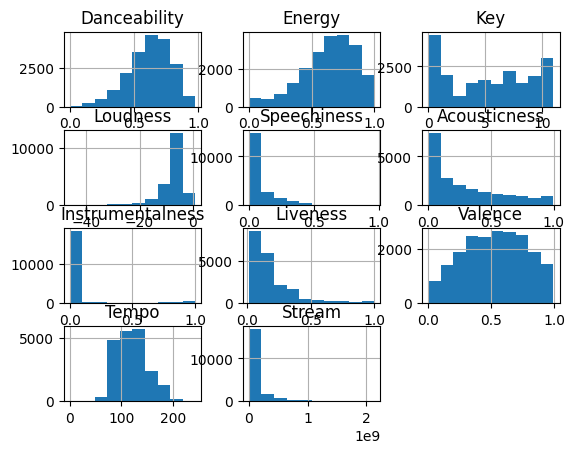

In [18]:
df2.hist()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_19404\3775340070.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df2.corr()


<AxesSubplot: >

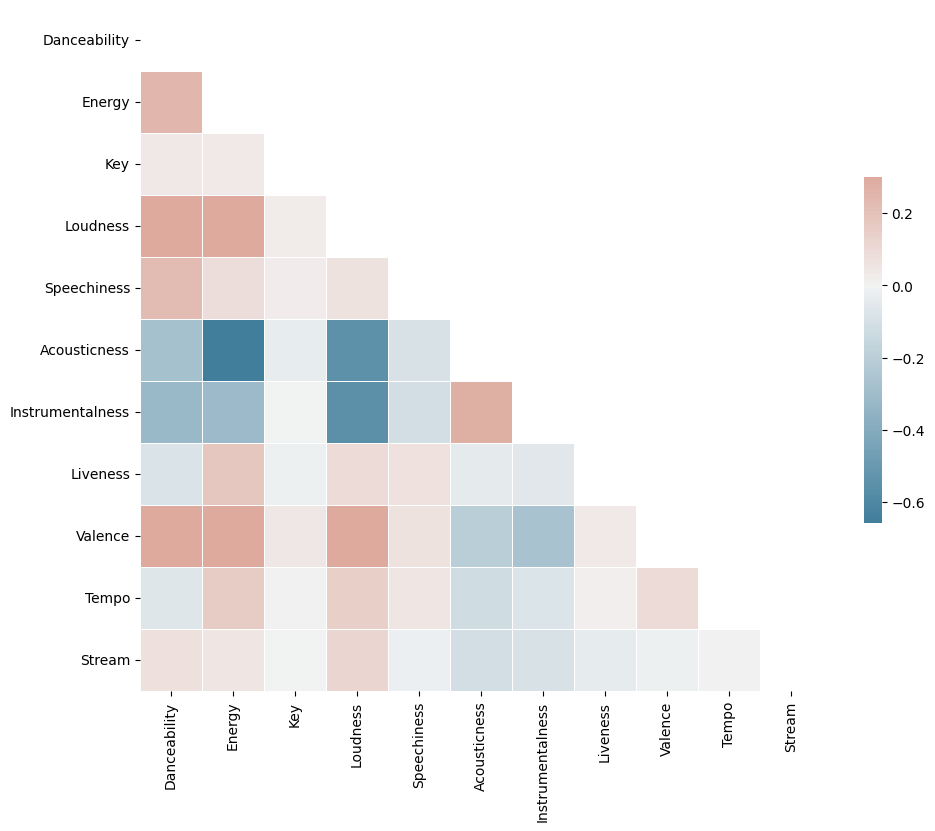

In [19]:
corr = df2.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<Figure size 400x400 with 0 Axes>

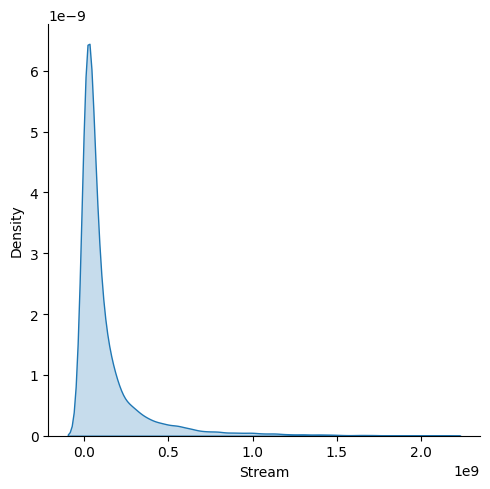

In [20]:
plt.figure(figsize=(4,4))
sns.displot(data = df2, x = 'Stream', kind='kde', fill=True)
plt.show()

<AxesSubplot: >

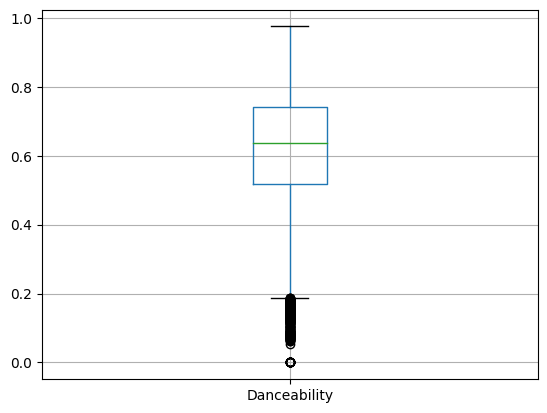

In [21]:
df2.select_dtypes(include='number').iloc[:,0:1].boxplot()

<AxesSubplot: >

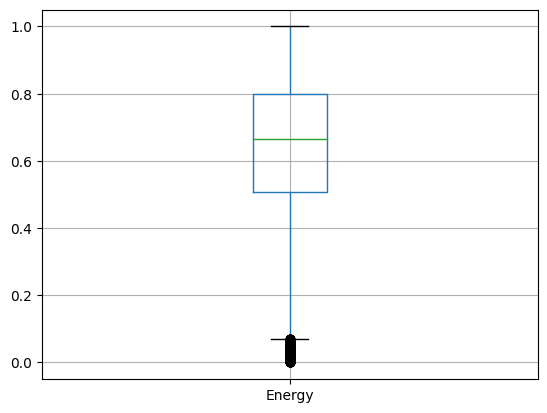

In [22]:
df2.select_dtypes(include='number').iloc[:,1:2].boxplot()

<AxesSubplot: >

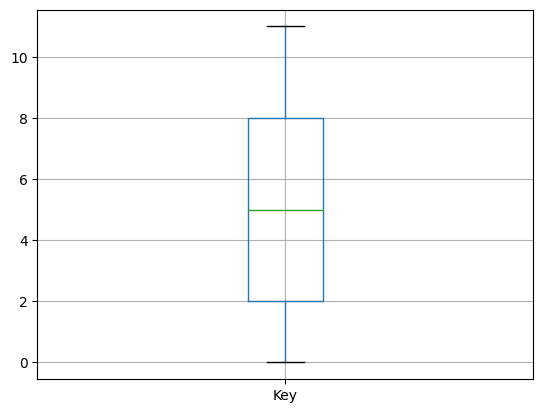

In [23]:
df2.select_dtypes(include='number').iloc[:,2:3].boxplot()

<AxesSubplot: >

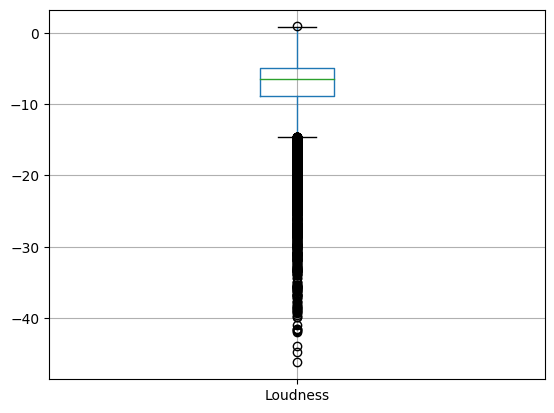

In [24]:
df2.select_dtypes(include='number').iloc[:,3:4].boxplot()

<AxesSubplot: >

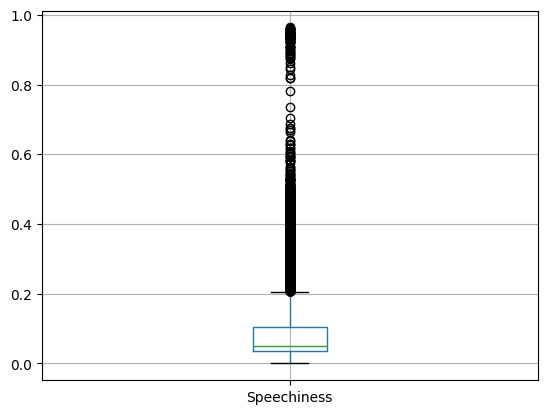

In [25]:
df2.select_dtypes(include='number').iloc[:,4:5].boxplot()

<AxesSubplot: >

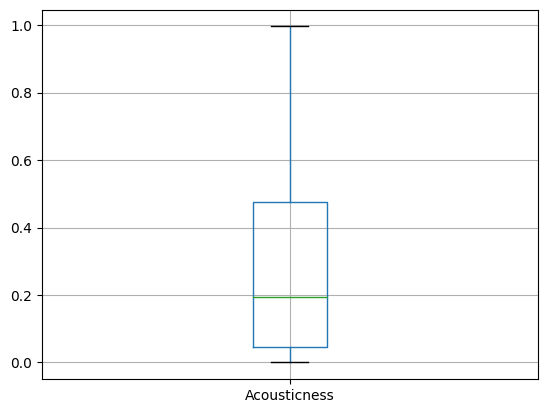

In [26]:
df2.select_dtypes(include='number').iloc[:,5:6].boxplot()

<AxesSubplot: >

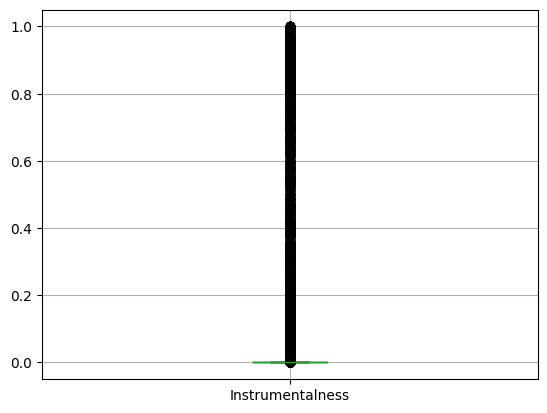

In [27]:
df2.select_dtypes(include='number').iloc[:,6:7].boxplot()

<AxesSubplot: >

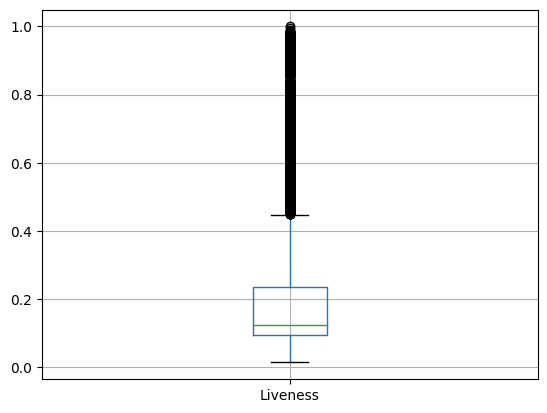

In [28]:
df2.select_dtypes(include='number').iloc[:,7:8].boxplot()

<AxesSubplot: >

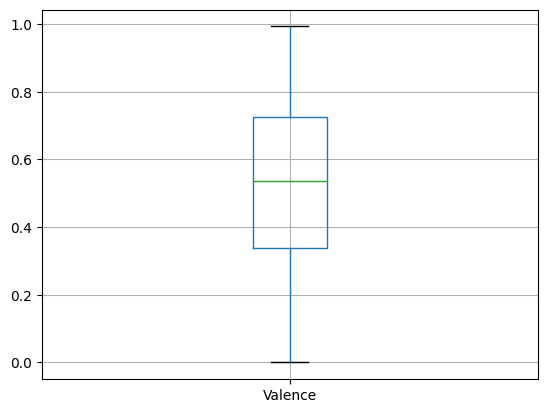

In [29]:
df2.select_dtypes(include='number').iloc[:,8:9].boxplot()

<AxesSubplot: >

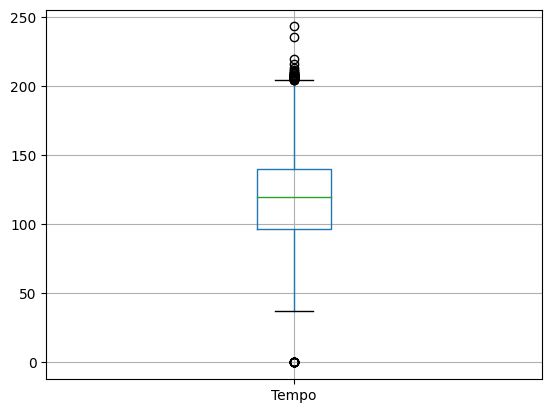

In [30]:
df2.select_dtypes(include='number').iloc[:,9:10].boxplot()

<AxesSubplot: >

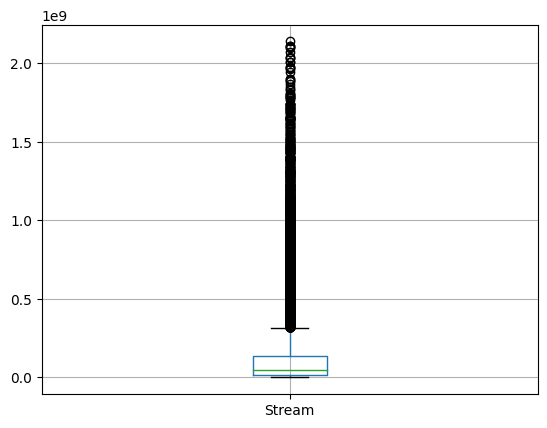

In [31]:
df2.select_dtypes(include='number').iloc[:,10:11].boxplot()

## Split Data

In [32]:
y = df2.Stream

In [55]:
y_transformed = np.log10(y)

In [34]:
df2 = df2.drop(columns=['Stream'])

In [56]:
X_train, X_test, y_train, y_test = train_test_split(df2, y_transformed, test_size=0.30, random_state=100)

## Procesamiento de la data

In [36]:
num_pipeline = Pipeline([
                            ('simple_imputer', SimpleImputer(missing_values=np.nan, strategy='mean')),
                            ('std_scaler', StandardScaler())                            
                        ])

In [37]:
cat_pipeline = Pipeline([
                        ('oh_enc', OneHotEncoder(drop='first',handle_unknown='ignore')),
                        ])

In [38]:
num_attribs = df2.select_dtypes(include='number').columns
cat_attribs = df2.select_dtypes(exclude='number').columns

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])

## Modelo

In [39]:
predictor=RandomForestRegressor()
model_pip = Pipeline([('col_transform', full_pipeline),
                      ('model', predictor)])

In [40]:
params_model = [{'model': [XGBRegressor()],
                 'model__n_estimators':[50,100,130,150,170,200],
                 'model__max_depth': [1,3,5,7,10],
                 'model__eta': [0.001, 0.01, 0.1]}
]
grid_model = GridSearchCV(model_pip,params_model,cv=5,scoring='neg_mean_absolute_error',n_jobs=-1)

In [41]:
entrenador = grid_model.fit(X_train,y_train)
print('Mejores modelo:', grid_model.best_params_)

Mejores modelo: {'model': XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.1, eval_metric=None,
             feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, predictor=None, ...), 'model__eta': 0.1, 'model__max_depth': 10, 'model__n_estimators': 200}


In [42]:
params_model = [{'model': [AdaBoostRegressor()],
                 'model__n_estimators':[50,100,150,200],
                 'model__learning_rate': [1,3,5],
                 'model__loss': ['linear','square','exponential'],
                 'model__random_state': [42]}
]
grid_model = GridSearchCV(model_pip,params_model,cv=5,scoring='neg_mean_absolute_error',n_jobs=-1)

In [43]:
entrenador = grid_model.fit(X_train,y_train)
print('Mejores modelo:', grid_model.best_params_)

Mejores modelo: {'model': AdaBoostRegressor(learning_rate=1, random_state=42), 'model__learning_rate': 1, 'model__loss': 'linear', 'model__n_estimators': 50, 'model__random_state': 42}


In [44]:
params_model = [{'model': [RandomForestRegressor()],
                 'model__n_estimators':[30,50,100,150,200],
                 'model__max_depth':[5,10,15,20],
                 'model__random_state':[42],
                 'model__n_jobs':[-1]}
]
grid_model = GridSearchCV(model_pip,params_model,cv=5,scoring='neg_mean_absolute_error',n_jobs=-1)

In [45]:
entrenador = grid_model.fit(X_train,y_train)
print('Mejores modelo:', grid_model.best_params_)

Mejores modelo: {'model': RandomForestRegressor(max_depth=20, n_estimators=200, n_jobs=-1,
                      random_state=42), 'model__max_depth': 20, 'model__n_estimators': 200, 'model__n_jobs': -1, 'model__random_state': 42}


In [46]:
params_model = [{'model': [XGBRegressor()],
                 'model__n_estimators':[200],
                 'model__max_depth': [10],
                 'model__eta': [0.1]},

                {'model': [AdaBoostRegressor()],
                 'model__n_estimators':[50],
                 'model__learning_rate': [1],
                 'model__loss': ['linear'],
                 'model__random_state': [42]},

                {'model': [RandomForestRegressor()],
                 'model__n_estimators':[200],
                 'model__max_depth':[20],
                 'model__random_state':[42],
                 'model__n_jobs':[-1]}
]
grid_model = GridSearchCV(model_pip,params_model,cv=5,scoring='neg_mean_absolute_error',n_jobs=-1)

In [47]:
entrenador = grid_model.fit(X_train,y_train)
print('Mejores modelo:', grid_model.best_params_)

Mejores modelo: {'model': XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.1, eval_metric=None,
             feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, predictor=None, ...), 'model__eta': 0.1, 'model__max_depth': 10, 'model__n_estimators': 200}


In [48]:
def get_stacked_regression():
    """
    """
    level0 = []
    level0.append(('lr', LinearRegression()))
    level0.append(('abr', AdaBoostRegressor(n_estimators = 50, learning_rate = 1, loss = 'linear', random_state = 42)))
    level0.append(('rfg', RandomForestRegressor(n_estimators=200, max_depth=20, random_state = 42)))
    
    level1 = XGBRegressor(n_estimators = 200, max_depth = 10, eta = 0.1)

    model = StackingRegressor(estimators=level0, 
                              final_estimator=level1, 
                              cv=5)

    return model

In [49]:
params_model = [{'model': [XGBRegressor()],
                 'model__n_estimators':[200],
                 'model__max_depth': [10],
                 'model__eta': [0.1]},

                {'model': [get_stacked_regression()],
                }
]
grid_model = GridSearchCV(model_pip,params_model,cv=5,scoring='neg_mean_absolute_error',n_jobs=-1)

In [63]:
entrenador = grid_model.fit(X_train,y_train)
print('Mejores modelo:', grid_model.best_params_)

Mejores modelo: {'model': StackingRegressor(cv=5,
                  estimators=[('lr', LinearRegression()),
                              ('abr',
                               AdaBoostRegressor(learning_rate=1,
                                                 random_state=42)),
                              ('rfg',
                               RandomForestRegressor(max_depth=20,
                                                     n_estimators=200,
                                                     random_state=42))],
                  final_estimator=XGBRegressor(base_score=None, booster=None,
                                               callbacks=None,
                                               colsample_bylevel=None,
                                               colsample_bynode=None,
                                               colsample_bytree=None,
                                               early_stoppi...
                                               feature_t

In [58]:
full_pipeline_with_predictor = Pipeline([
        ("preparation", full_pipeline),
        ("regression", get_stacked_regression())
])

In [59]:
full_pipeline_with_predictor.fit(X_train, y_train)

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simple_imputer',
                                                                   SimpleImputer()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  Index(['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('oh_enc',
                                                                   OneHotEncoder(drop=...
                                                                gamma=None,
                                                                gpu_id=None,
                                                                grow_policy=None,
                                                                importance_type=None,
                                                                interaction_constraints=None,
                                                                learning_rate=None,
                                                                max_bin=None,
                                                                max_cat_threshold=None,
                                                                max_cat_to_onehot=None,
                                                                max_delta_step=None,
                                                                max_depth=10,
                                                                max_leaves=None,
                                                                min_child_weight=None,
                                                                missing=nan,
                                                                monotone_constraints=None,
                                                                n_estimators=200,
                                                                n_jobs=None,
                                                                num_parallel_tree=None,
                                                                predictor=None, ...)))])

In [61]:
final_predictions = full_pipeline_with_predictor.predict(X_test)

final_predictions=list(map(lambda x:pow(10,x),final_predictions))
y_test=list(map(lambda x:pow(10,x),y_test))

c:\Users\Usuario\miniforge3\envs\mlm\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [62]:
final_mse = mean_absolute_error(y_test, final_predictions)
final_mse

95841872.85783787